In [340]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit

### Read input

In [4]:
features_and_flourishing = pd.read_csv('../preprocess/data/features_and_flourishing.csv')
features_and_panas = pd.read_csv('../preprocess/data/features_and_panas.csv')

In [7]:
features_and_flourishing = features_and_flourishing.iloc[:,1:]
features_and_flourishing[:5]

,uid,activity_mean,activity_var,audio_mean,audio_var,bluetooth_sum,bluetooth_var,bluetooth_mean,bluetooth_day_num,conversation_sum,...,phonelock_sum,phonelock_var,phonelock_mean,phonelock_day_num,in_time_second,near_time_second,in_all_percentage,pre_score,post_socre,Flourishing_score
0,u00,0.349241,0.924555,0.231950,0.664766,0.549544,0.732848,0.495022,0.264706,0.127208,...,0.494530,0.647318,0.549495,0.113636,0.348794,0.348726,0.624395,0,0,0.0
1,u01,0.483003,0.980101,0.167804,0.297014,0.890670,0.894641,0.919892,0.264706,0.031609,...,0.353764,0.314931,0.302449,0.204545,0.508330,0.155153,0.838135,0,0,0.0
2,u02,0.641957,0.991142,0.466649,0.540162,0.330216,0.663491,0.355197,0.000000,0.320835,...,0.743367,0.830154,0.861874,0.136364,0.075746,0.834783,0.152821,0,0,0.0
3,u03,1.000000,0.997714,1.000000,1.000000,1.000000,0.959529,1.000000,0.735294,1.000000,...,0.772199,0.110290,0.643577,0.659091,0.255011,0.985731,0.012731,-1,-1,-1.0
4,u04,0.000000,0.946310,0.000000,0.830575,0.489869,0.673099,0.420698,0.264706,0.127504,...,0.183892,0.345974,0.023715,0.250000,0.406917,0.669608,0.361376,-1,-1,-1.0


In [8]:
features_and_panas = features_and_panas.iloc[:,1:]
features_and_panas[:5]

,uid,activity_mean,activity_var,audio_mean,audio_var,bluetooth_sum,bluetooth_var,bluetooth_mean,bluetooth_day_num,conversation_sum,...,phonelock_day_num,in_time_second,near_time_second,in_all_percentage,pre_positive,post_positive,positive,pre_negative,post_negative,negative
0,u00,0.349241,0.924555,0.231950,0.664766,0.549544,0.732848,0.495022,0.264706,0.127208,...,0.113636,0.348794,0.348726,0.624395,0,0,0.0,1,0,1.0
1,u01,0.483003,0.980101,0.167804,0.297014,0.890670,0.894641,0.919892,0.264706,0.031609,...,0.204545,0.508330,0.155153,0.838135,0,0,0.0,0,0,0.0
2,u02,0.641957,0.991142,0.466649,0.540162,0.330216,0.663491,0.355197,0.000000,0.320835,...,0.136364,0.075746,0.834783,0.152821,-1,0,0.0,0,-1,-1.0
3,u03,1.000000,0.997714,1.000000,1.000000,1.000000,0.959529,1.000000,0.735294,1.000000,...,0.659091,0.255011,0.985731,0.012731,0,0,0.0,0,0,0.0
4,u04,0.000000,0.946310,0.000000,0.830575,0.489869,0.673099,0.420698,0.264706,0.127504,...,0.250000,0.406917,0.669608,0.361376,0,0,0.0,0,0,0.0


### Train post value of Flourishing

In [45]:
# get all features and pre score of flourishing (rm uid, post, avg)
X = features_and_flourishing.iloc[:,1:29]
X[:5]

,activity_mean,activity_var,audio_mean,audio_var,bluetooth_sum,bluetooth_var,bluetooth_mean,bluetooth_day_num,conversation_sum,conversation_var,...,phonecharge_mean,phonecharge_day_num,phonelock_sum,phonelock_var,phonelock_mean,phonelock_day_num,in_time_second,near_time_second,in_all_percentage,pre_score
0,0.349241,0.924555,0.231950,0.664766,0.549544,0.732848,0.495022,0.264706,0.127208,0.595035,...,0.416777,0.500000,0.494530,0.647318,0.549495,0.113636,0.348794,0.348726,0.624395,0
1,0.483003,0.980101,0.167804,0.297014,0.890670,0.894641,0.919892,0.264706,0.031609,0.398812,...,0.880553,0.608696,0.353764,0.314931,0.302449,0.204545,0.508330,0.155153,0.838135,0
2,0.641957,0.991142,0.466649,0.540162,0.330216,0.663491,0.355197,0.000000,0.320835,0.318762,...,0.709891,0.086957,0.743367,0.830154,0.861874,0.136364,0.075746,0.834783,0.152821,0
3,1.000000,0.997714,1.000000,1.000000,1.000000,0.959529,1.000000,0.735294,1.000000,1.000000,...,0.558807,0.739130,0.772199,0.110290,0.643577,0.659091,0.255011,0.985731,0.012731,-1
4,0.000000,0.946310,0.000000,0.830575,0.489869,0.673099,0.420698,0.264706,0.127504,0.915968,...,0.973175,0.260870,0.183892,0.345974,0.023715,0.250000,0.406917,0.669608,0.361376,-1


In [46]:
y = features_and_flourishing['pre_score']
y[:5]

0    0
1    0
2    0
3   -1
4   -1
Name: pre_score, dtype: int64

In [47]:
# xgb require: label must be in [0, num_class)
# here add one to all pre_score(y) i.e. -1 -> 0, 0 -> 1, 1 -> 2
y = y+1
y[:5]

0    1
1    1
2    1
3    0
4    0
Name: pre_score, dtype: int64

In [288]:
# some xgboost params introduction: https://zhuanlan.zhihu.com/p/31182879

# param eta:
# e.g. first tree y_predict = 3.3，label = 4.0，
# if eta = 0.3，then, second tree's training residual = 4.0-3.3*0.3（eta)=3.01.
params = {
    'booster': 'gbtree', # tree based model another opt - gblinear
    'objective': 'multi:softmax', # multi-class classification
    'num_class': 3,
    'gamma': 0.1, # min loss reduction required to make a split [0,inf]
    'max_depth': 4, # [1,inf] default 6
    'lambda': 2, 
    'subsample': 1, # subsample ratio for training robust overfitting [0,1]
    #'colsample_bytree': 0.7, # subsample ratio of columns select to construct tree
    'min_child_weight': 1, # min sum of instance weight needed in a child [0,inf] default 1
    'silent': 1,
    'eta': 0.1, # learning rate [0,1] default 0.3 step size shrinkage (prevents overfitting)
    'seed': 1000,
    'nthread': 4,
}

In [289]:
xgb.train?

**Gain** is the improvement in accuracy brought by a feature to the branches it is on. The idea is that before adding a new split on a feature X to the branch there was some wrongly classified elements, after adding the split on this feature, there are two new branches, and each of these branch is more accurate (one branch saying if your observation is on this branch then it should be classified as 1, and the other branch saying the exact opposite).

**gain**: the average gain across all splits the feature is used in.

**total_gain**: the total gain across all splits the feature is used in.

---

**weight**: the number of times a feature is used to split the data across all trees.

---

**Cover** measures the relative quantity of observations concerned by a feature.

**cover**: the average coverage across all splits the feature is used in.

**total_cover**: the total coverage across all splits the feature is used in.

The Cover metric means the relative number of observations related to this feature. For example, if you have 100 observations, 4 features and 3 trees, and suppose feature1 is used to decide the leaf node for 10, 5, and 2 observations in tree1, tree2 and tree3 respectively; then the metric will count cover for this feature as 10+5+2 = 17 observations. This will be calculated for all the 4 features and the cover will be 17 expressed as a percentage for all features' cover metrics.

In [101]:
importance_type = ['weight', 'gain', 'cover', 'total_gain', 'total_cover']
model.get_score(importance_type=importance_type[2])

{'audio_var': 7.854121913148146,
 'activity_var': 8.242587188965517,
 'phonecharge_var': 9.083088802857143,
 'phonelock_var': 9.03389855277778,
 'phonecharge_mean': 7.328369268666665,
 'bluetooth_day_num': 10.836888894210526,
 'near_time_second': 10.3076458,
 'in_time_second': 7.710604161874999,
 'dark_var': 7.93540454,
 'bluetooth_sum': 7.61530423,
 'phonecharge_day_num': 6.686363060000001,
 'activity_mean': 7.4370589266666665,
 'conversation_mean': 7.12179375,
 'conversation_sum': 6.3998065,
 'audio_mean': 7.002482316666669,
 'phonelock_day_num': 6.48046141875,
 'conversation_day_num': 6.125249625}

In [ ]:
# Customize loss function, and evaluation metric
# https://github.com/dmlc/xgboost/blob/master/demo/guide-python/custom_objective.py

### Try cross validation

In [192]:
#https://github.com/dmlc/xgboost/blob/master/demo/guide-python/cross_validation.py

# do cross validation, this will print result out as
# [iteration]  metric_name:mean_value+std_value
# std_value is standard deviation of the metric

# use merror or mlogloss for multi-class classification
res = xgb.cv(params, dtrain, 20, nfold=4,
       metrics={'merror'}, seed=0)
#     callbacks=[xgb.callback.print_evaluation(show_stdv=True)])
print(res)

    train-merror-mean  train-merror-std  test-merror-mean  test-merror-std
0            0.230263          0.040491          0.226190         0.132030
1            0.205263          0.005263          0.309524         0.023809
2            0.205263          0.005263          0.309524         0.023809
3            0.205263          0.005263          0.309524         0.023809
4            0.205263          0.005263          0.309524         0.023809
5            0.205263          0.005263          0.309524         0.023809
6            0.205263          0.005263          0.309524         0.023809
7            0.205263          0.005263          0.309524         0.023809
8            0.205263          0.005263          0.309524         0.023809
9            0.205263          0.005263          0.309524         0.023809
10           0.205263          0.005263          0.309524         0.023809
11           0.217763          0.019102          0.309524         0.023809
12           0.205263    

### Removing useless features and Rerun experiments

In [343]:
def calculate_accuracy_xgboost(model, y_test, pred_test):
    # calculate accuracy
    cnt1 = 0
    cnt2 = 0
    correct_indices = []
    for i in range(len(y_test)):
        if pred_test[i] == y_test[i]:
            cnt1 += 1
            correct_indices.append(i)
        else:
            cnt2 += 1

    print('Correct indices: ', correct_indices)
    print("Accuracy: %.2f %% " % (100 * cnt1 / (cnt1 + cnt2)))

    # show feature importance
    xgb.plot_importance(model)
    plt.show()


def train_xgboost(X, y):
    # get feature names from dataframe X
    feature_names = X.columns
    
    # convert dataframe to numpy arrays
    X_matrix = X.values
    y_matrix = y.values

    # try shuffle and split, add randomise to training
    folds = 1
    shuffle = ShuffleSplit(n_splits=folds, test_size=0.33)
    for fold, (train_index, test_index) in enumerate(shuffle.split(X_matrix, y_matrix)):
        X_train = X_matrix[train_index]
        y_train = y_matrix[train_index]
        X_test = X_matrix[test_index]
        y_test = X_matrix[test_index]
        
        dtrain = xgb.DMatrix(X_train, y_train, feature_names=feature_names)
        dtest = xgb.DMatrix(X_test, feature_names=feature_names)
        
        # run 500 times
        num_rounds = 500
        # train xgboost model
        model = xgb.train(param_list, dtrain, num_rounds, 
                          evals = [(dtrain, 'train')],
                          early_stopping_rounds = 10)
        
        print('Training:')
        pred_train = model.predict(dtrain)
        calculate_accuracy_xgboost(model, y_train, pred_train)
        
        print('Testing:')
        pred_test = model.predict(dtest)
        calculate_accuracy_xgboost(model, y_test, pred_test)

    
    # cross validation
    print('Cross validation:')
    training_size = X_train.shape[0]
    res = xgb.cv(params, dtrain, 50, nfold = training_size, #nfold=4,
                metrics={'mlogloss'}, seed=0, as_pandas=True,
                early_stopping_rounds = 10)
    # metrics: mlogloss, merror
    #     callbacks=[xgb.callback.print_evaluation(show_stdv=True)])
    #print(res)
    display(res.describe())
    print()
    
    return model

In [341]:
def train_xgboost(X, y):
    # get feature names from dataframe X
    feature_names = X.columns
    
    # convert dataframe to numpy arrays
    X_matrix = X.values
    y_matrix = y.values
    
    # split data to training and testing sets
    # 2/3 for training, 1/3 for testing
    X_train, X_test, y_train, y_test = train_test_split(X_matrix, y_matrix, 
                                    test_size=0.33, random_state=1234565)
    dtrain = xgb.DMatrix(X_train, y_train, feature_names=feature_names)
    dtest = xgb.DMatrix(X_test, feature_names=feature_names)

    # run 500 times
    num_rounds = 500
    # train xgboost model
    model = xgb.train(param_list, dtrain, num_rounds, 
                      evals = [(dtrain, 'train')],
                      early_stopping_rounds = 10)
    
    # predict label for training data
    print('Training:')
    pred_train = model.predict(dtrain)
    calculate_accuracy_xgboost(model, y_train, pred_train)

    # use the model to predict post score for testset
    print('Testing:')
    pred_test = model.predict(dtest)
    calculate_accuracy_xgboost(model, y_test, pred_test)
    
    # cross validation
    print('Cross validation:')
    training_size = X_train.shape[0]
    res = xgb.cv(params, dtrain, 50, nfold = training_size, #nfold=4,
                metrics={'mlogloss'}, seed=0, as_pandas=True,
                early_stopping_rounds = 10)
    # metrics: mlogloss, merror
    #     callbacks=[xgb.callback.print_evaluation(show_stdv=True)])
    #print(res)
    display(res.describe())
    print()
    
    return model

In [312]:
xgb.train?

[0]	train-merror:0.304348
Will train until train-merror hasn't improved in 10 rounds.
[1]	train-merror:0.304348
[2]	train-merror:0.26087
[3]	train-merror:0.26087
[4]	train-merror:0.26087
[5]	train-merror:0.26087
[6]	train-merror:0.26087
[7]	train-merror:0.26087
[8]	train-merror:0.26087
[9]	train-merror:0.26087
[10]	train-merror:0.26087
[11]	train-merror:0.26087
[12]	train-merror:0.26087
Stopping. Best iteration:
[2]	train-merror:0.26087

Training:
Correct indices:  [0, 1, 2, 3, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 22]
Accuracy: 73.91 % 


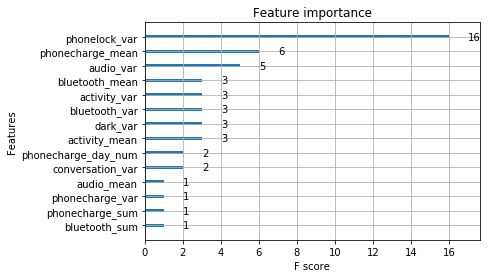

Testing:


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [345]:
model = train_xgboost(X, y)
print('Feature gain: ')
model.get_score(importance_type='gain')

Cross validation:


,train-mlogloss-mean,train-mlogloss-std,test-mlogloss-mean,test-mlogloss-std
count,17.000000,17.000000,17.000000,17.000000
mean,0.570442,0.022513,0.762941,0.428861
std,0.216738,0.009641,0.128334,0.199253
min,0.306579,0.002204,0.631853,0.064667
25%,0.394561,0.016656,0.658341,0.286163
50%,0.521501,0.025952,0.723201,0.458642
75%,0.710593,0.030521,0.834802,0.587539
max,1.007453,0.032214,1.045309,0.706889



[0]	train-merror:0.26087
Will train until train-merror hasn't improved in 10 rounds.
[1]	train-merror:0.26087
[2]	train-merror:0.26087
[3]	train-merror:0.26087
[4]	train-merror:0.26087
[5]	train-merror:0.26087
[6]	train-merror:0.26087
[7]	train-merror:0.26087
[8]	train-merror:0.26087
[9]	train-merror:0.26087
[10]	train-merror:0.173913
[11]	train-merror:0.173913
[12]	train-merror:0.173913
[13]	train-merror:0.173913
[14]	train-merror:0.173913
[15]	train-merror:0.173913
[16]	train-merror:0.173913
[17]	train-merror:0.173913
[18]	train-merror:0.173913
[19]	train-merror:0.173913
[20]	train-merror:0.173913
Stopping. Best iteration:
[10]	train-merror:0.173913

Training:
Correct indices:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 21, 22]
Accuracy: 82.61 % 


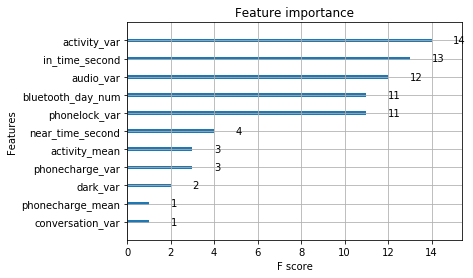

Testing:
Correct indices:  [0, 4, 5, 7, 8, 9, 10, 11]
Accuracy: 66.67 % 


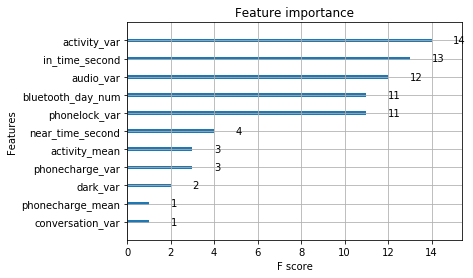

{'conversation_var': 0.300896525,
 'activity_var': 0.8868785762857143,
 'phonelock_var': 0.5193383422727272,
 'near_time_second': 0.40893565125,
 'audio_var': 0.6639376283333334,
 'phonecharge_var': 0.35397147166666665,
 'phonecharge_mean': 0.23388195,
 'bluetooth_day_num': 0.5352991819090909,
 'in_time_second': 0.8383950042307691,
 'dark_var': 0.28880617,
 'activity_mean': 0.150087903}

In [335]:
# remove gain below 0.2
X1 = X.drop(columns = ['conversation_day_num',
                      'conversation_sum',
                      'conversation_mean',
                      'dark_day_num',
                      'dark_mean',
                      'phonelock_mean',
                      'phonelock_day_num'])
model = train_xgboost(X1, y)
model.get_score(importance_type='gain')

Cross validation:


,train-mlogloss-mean,train-mlogloss-std,test-mlogloss-mean,test-mlogloss-std
count,36.000000,36.000000,36.000000,36.000000
mean,0.497523,0.016512,0.851891,0.594363
std,0.226280,0.003856,0.093890,0.258561
min,0.238538,0.003779,0.764360,0.052922
25%,0.311501,0.015566,0.779105,0.405988
50%,0.432153,0.017534,0.815908,0.647269
75%,0.637916,0.019035,0.900059,0.808912
max,1.030467,0.020321,1.076261,0.942494



[0]	train-merror:0.26087
Will train until train-merror hasn't improved in 10 rounds.
[1]	train-merror:0.26087
[2]	train-merror:0.26087
[3]	train-merror:0.26087
[4]	train-merror:0.26087
[5]	train-merror:0.26087
[6]	train-merror:0.26087
[7]	train-merror:0.26087
[8]	train-merror:0.26087
[9]	train-merror:0.26087
[10]	train-merror:0.26087
Stopping. Best iteration:
[0]	train-merror:0.26087

Training:
Correct indices:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 14, 15, 17, 21, 22]
Accuracy: 73.91 % 


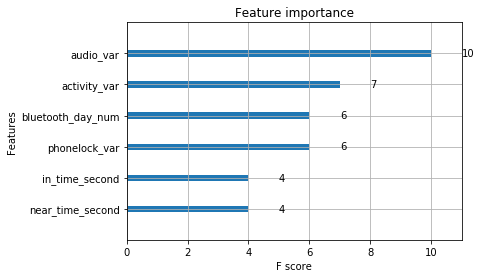

Testing:
Correct indices:  [0, 4, 5, 7, 8, 9, 10, 11]
Accuracy: 66.67 % 


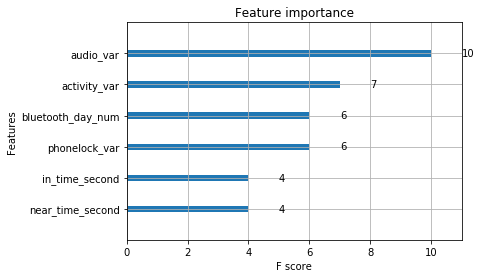

{'audio_var': 0.5664040953,
 'activity_var': 0.9767562657142858,
 'phonelock_var': 0.5569950938333332,
 'near_time_second': 0.393799782,
 'bluetooth_day_num': 0.4695025828333333,
 'in_time_second': 0.67387749225}

In [336]:
# select gain > 0.4
X1 = X[['activity_var',
        'in_time_second',
        'audio_var',
        'bluetooth_day_num',
        'phonelock_var',
        'near_time_second'
       ]]
model = train_xgboost(X1, y)
model.get_score(importance_type='gain')

Cross validation:


,train-mlogloss-mean,train-mlogloss-std,test-mlogloss-mean,test-mlogloss-std
count,36.000000,36.000000,36.000000,36.000000
mean,0.497543,0.016160,0.851560,0.594777
std,0.226412,0.003754,0.094099,0.258455
min,0.238221,0.003779,0.764529,0.052922
25%,0.311458,0.015246,0.778094,0.406932
50%,0.432296,0.017208,0.815737,0.647878
75%,0.638157,0.018633,0.899960,0.808996
max,1.030467,0.019751,1.076261,0.941848



[0]	train-merror:0.26087
Will train until train-merror hasn't improved in 10 rounds.
[1]	train-merror:0.26087
[2]	train-merror:0.26087
[3]	train-merror:0.26087
[4]	train-merror:0.26087
[5]	train-merror:0.26087
[6]	train-merror:0.26087
[7]	train-merror:0.173913
[8]	train-merror:0.26087
[9]	train-merror:0.173913
[10]	train-merror:0.173913
[11]	train-merror:0.173913
[12]	train-merror:0.173913
[13]	train-merror:0.173913
[14]	train-merror:0.173913
[15]	train-merror:0.173913
[16]	train-merror:0.173913
[17]	train-merror:0.173913
Stopping. Best iteration:
[7]	train-merror:0.173913

Training:
Correct indices:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 21, 22]
Accuracy: 82.61 % 


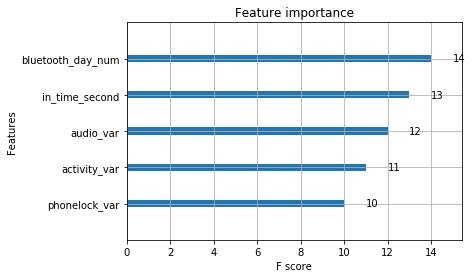

Testing:
Correct indices:  [0, 4, 5, 7, 8, 9, 10, 11]
Accuracy: 66.67 % 


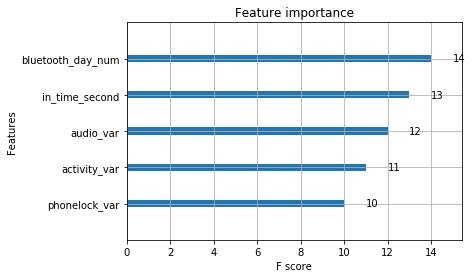

{'audio_var': 0.6274478534999999,
 'activity_var': 0.9415716613636362,
 'phonelock_var': 0.5849658131000001,
 'bluetooth_day_num': 0.42898775842857134,
 'in_time_second': 0.6739076562307693}

In [337]:
# LOWEST TEST ERROR MEAN select gain > 0.45
X1 = X[['activity_var',
        'in_time_second',
        'audio_var',
        'bluetooth_day_num',
        'phonelock_var'
       ]]
model = train_xgboost(X1, y)
model.get_score(importance_type='gain')

Cross validation:


,train-mlogloss-mean,train-mlogloss-std,test-mlogloss-mean,test-mlogloss-std
count,27.000000,27.000000,27.000000,27.000000
mean,0.602490,0.012948,0.905749,0.464559
std,0.196451,0.003013,0.070611,0.202753
min,0.364181,0.003618,0.829538,0.053288
25%,0.441504,0.012585,0.848125,0.326145
50%,0.552520,0.013794,0.880688,0.493904
75%,0.729481,0.014837,0.949842,0.631076
max,1.033553,0.015923,1.067001,0.740449



[0]	train-merror:0.26087
Will train until train-merror hasn't improved in 10 rounds.
[1]	train-merror:0.26087
[2]	train-merror:0.26087
[3]	train-merror:0.26087
[4]	train-merror:0.26087
[5]	train-merror:0.26087
[6]	train-merror:0.26087
[7]	train-merror:0.26087
[8]	train-merror:0.26087
[9]	train-merror:0.26087
[10]	train-merror:0.26087
Stopping. Best iteration:
[0]	train-merror:0.26087

Training:
Correct indices:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 14, 15, 17, 21, 22]
Accuracy: 73.91 % 


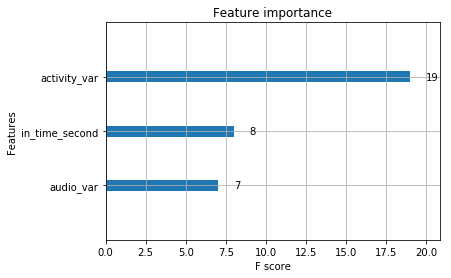

Testing:
Correct indices:  [0, 4, 5, 7, 8, 9, 10, 11]
Accuracy: 66.67 % 


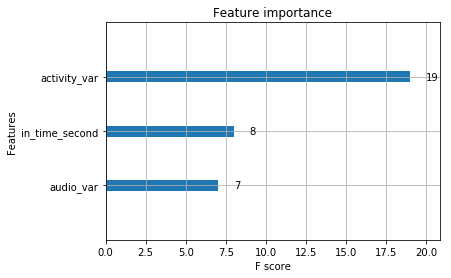

{'activity_var': 0.6664097470000001,
 'audio_var': 0.6316843032857145,
 'in_time_second': 0.8112058259999999}

In [338]:
# select gain > 0.5
X1 = X[['activity_var',
        'in_time_second',
        'audio_var'
       ]]
model = train_xgboost(X1, y)
model.get_score(importance_type='gain')

Cross validation:


,train-mlogloss-mean,train-mlogloss-std,test-mlogloss-mean,test-mlogloss-std
count,14.000000,14.000000,14.000000,14.000000
mean,0.811511,0.017729,0.950510,0.388177
std,0.119215,0.006792,0.050323,0.185078
min,0.662931,0.004001,0.905061,0.067848
25%,0.715834,0.013502,0.910916,0.253926
50%,0.788600,0.019680,0.929946,0.406186
75%,0.889926,0.023145,0.976416,0.536100
max,1.038519,0.025225,1.060670,0.646272



[0]	train-merror:0.26087
Will train until train-merror hasn't improved in 10 rounds.
[1]	train-merror:0.26087
[2]	train-merror:0.26087
[3]	train-merror:0.26087
[4]	train-merror:0.26087
[5]	train-merror:0.26087
[6]	train-merror:0.26087
[7]	train-merror:0.26087
[8]	train-merror:0.26087
[9]	train-merror:0.26087
[10]	train-merror:0.26087
Stopping. Best iteration:
[0]	train-merror:0.26087

Training:
Correct indices:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 14, 15, 17, 21, 22]
Accuracy: 73.91 % 


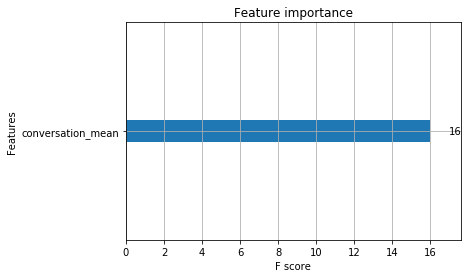

Testing:
Correct indices:  [0, 4, 5, 7, 8, 9, 10, 11]
Accuracy: 66.67 % 


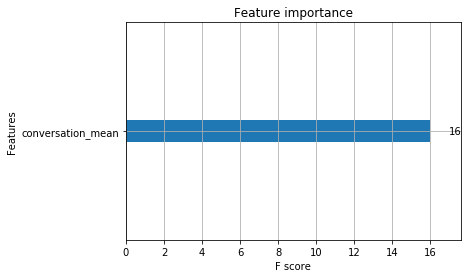

{'conversation_mean': 0.163730345625}

In [339]:
X1 = X[['conversation_mean']]
model = train_xgboost(X1, y)
model.get_score(importance_type='gain')